In [1]:
import pandas as pd

df = pd.read_csv('data/loan_data_sample.csv', index_col='SK_ID_CURR')
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE
SK_ID_CURR,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Higher education
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special


In [2]:
numeric_df = df.copy()
numeric_df['NAME_CONTRACT_TYPE'] = numeric_df['NAME_CONTRACT_TYPE'].map({'Cash loans': 0, 'Revolving loans': 1})
numeric_df['CODE_GENDER'] = numeric_df['CODE_GENDER'].map({'M': 0, 'F': 1})
numeric_df['FLAG_OWN_CAR'] = numeric_df['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})
numeric_df['FLAG_OWN_REALTY'] = numeric_df['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})
numeric_df['NAME_EDUCATION_TYPE'] = numeric_df['NAME_EDUCATION_TYPE'].map({'Lower secondary': 0,
                                                                           'Secondary / secondary special': 0,
                                                                           'Incomplete higher': 1,
                                                                           'Higher education': 2,
                                                                           'Academic degree': 2})
numeric_df.dropna(inplace=True)

In [3]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307217 entries, 100002 to 456255
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               307217 non-null  int64  
 1   NAME_CONTRACT_TYPE   307217 non-null  int64  
 2   CODE_GENDER          307217 non-null  float64
 3   FLAG_OWN_CAR         307217 non-null  int64  
 4   FLAG_OWN_REALTY      307217 non-null  int64  
 5   CNT_CHILDREN         307217 non-null  int64  
 6   AMT_INCOME_TOTAL     307217 non-null  float64
 7   AMT_CREDIT           307217 non-null  float64
 8   AMT_ANNUITY          307217 non-null  float64
 9   AMT_GOODS_PRICE      307217 non-null  float64
 10  NAME_EDUCATION_TYPE  307217 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 28.1 MB


<AxesSubplot:ylabel='Frequency'>

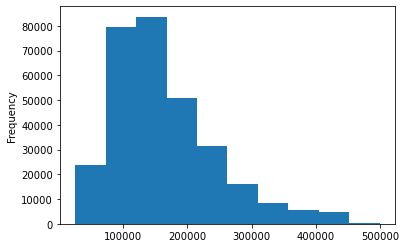

In [4]:
numeric_df[numeric_df['AMT_INCOME_TOTAL'] < 500000]['AMT_INCOME_TOTAL'].plot.hist()

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

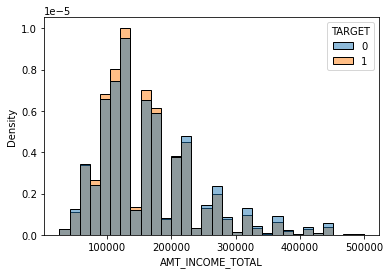

In [5]:
import seaborn as sns

sns.histplot(numeric_df[numeric_df['AMT_INCOME_TOTAL'] < 500000],
             x='AMT_INCOME_TOTAL',
             hue='TARGET',
             common_norm=False,
             stat='density',
             bins=30)

Fractions of data in the split nodes from example 1

In [6]:
print(numeric_df['TARGET'].value_counts())
print(numeric_df['TARGET'].value_counts(normalize=True))

0    282413
1     24804
Name: TARGET, dtype: int64
0    0.919262
1    0.080738
Name: TARGET, dtype: float64


In [7]:
print(numeric_df[numeric_df['AMT_INCOME_TOTAL'] < 200000]['TARGET'].value_counts())
print(numeric_df[numeric_df['AMT_INCOME_TOTAL'] < 200000]['TARGET'].value_counts(normalize=True))

0    200816
1     18532
Name: TARGET, dtype: int64
0    0.915513
1    0.084487
Name: TARGET, dtype: float64


In [8]:
print(numeric_df[numeric_df['AMT_INCOME_TOTAL'] >= 200000]['TARGET'].value_counts())
print(numeric_df[numeric_df['AMT_INCOME_TOTAL'] >= 200000]['TARGET'].value_counts(normalize=True))

0    81597
1     6272
Name: TARGET, dtype: int64
0    0.928621
1    0.071379
Name: TARGET, dtype: float64


Gini calculations for the split nodes from the example in figure 1.

In [9]:
1 - 0.92 ** 2 - 0.08 ** 2

0.14719999999999997

In [10]:
1 - 0.93 ** 2 - 0.07 ** 2

0.1301999999999999

## Fitting a decision tree

In [11]:
from sklearn.model_selection import train_test_split

features = numeric_df.drop('TARGET', axis=1)
targets = numeric_df['TARGET']

x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.9835772442407513
0.857834776381746


In [13]:
dt.get_depth()

50

In [14]:
small_dt = DecisionTreeClassifier(max_depth=2, max_features=None)
small_dt.fit(x_train, y_train)
print(small_dt.score(x_train, y_train))
print(small_dt.score(x_test, y_test))

0.9192620176032499
0.9192630688106244


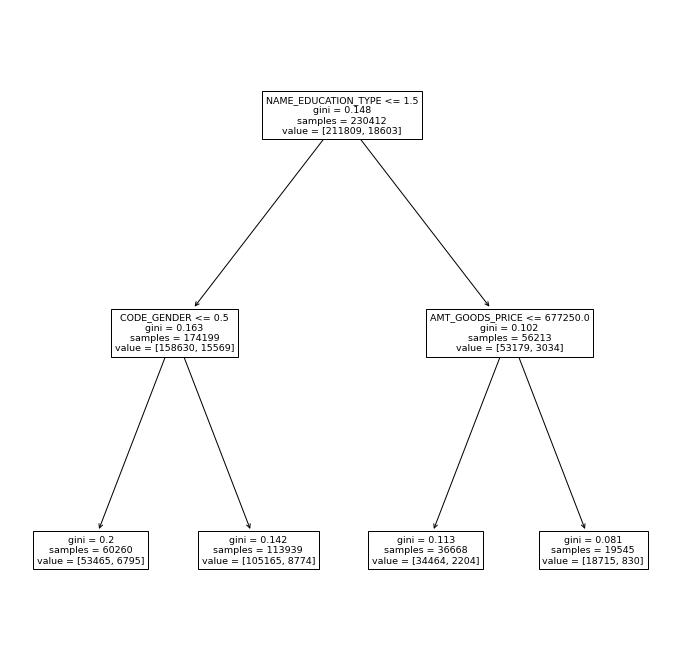

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12, 12))
_ = plot_tree(small_dt, feature_names=features.columns)
plt.savefig('B17030_15_02.png', facecolor='w')

# Random forests

## sklearn

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.9192880579136503
0.9192630688106244


In [17]:
features.shape

(307217, 10)

In [25]:
from sklearn.model_selection import GridSearchCV

x_tr_sample = x_train.sample(1000)
y_tr_sample = y_train.loc[x_tr_sample.index]

params = {'n_estimators': [100, 300, 500],
         'max_depth': [10, 15, 20],
         'max_features': [3, 6, 9],
         'random_state': [42],
         'n_jobs': [-1]}
gs = GridSearchCV(RandomForestClassifier(), param_grid=params)
gs.fit(x_tr_sample, y_tr_sample)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20], 'max_features': [3, 6, 9],
                         'n_estimators': [100, 300, 500], 'n_jobs': [-1],
                         'random_state': [42]})

In [26]:
gs.best_estimator_

RandomForestClassifier(max_depth=10, max_features=3, n_jobs=-1, random_state=42)

In [27]:
gs.best_score_

0.9179999999999999

## H2O random forests

In [28]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 15+36-1562, mixed mode, sharing)
  Starting server from C:\Users\words\anaconda3\envs\datasci\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\words\AppData\Local\Temp\tmplzgfb9fc
  JVM stdout: C:\Users\words\AppData\Local\Temp\tmplzgfb9fc\h2o_words_started_from_python.out
  JVM stderr: C:\Users\words\AppData\Local\Temp\tmplzgfb9fc\h2o_words_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Denver
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month and 7 days
H2O_cluster_name:,H2O_from_python_words_i7r4a1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.977 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [49]:
hf = h2o.H2OFrame(df)
hf['TARGET'] = hf['TARGET'].asfactor()
train, valid = hf.split_frame(ratios=[.8], seed=42)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [52]:
hf.columns

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_EDUCATION_TYPE']

In [53]:
from h2o.estimators import H2ORandomForestEstimator

drf = H2ORandomForestEstimator(ntrees=100, max_depth=10, mtries=3)
feature_columns = hf.columns
feature_columns.remove('TARGET')
target_column = 'TARGET'
drf.train(x=feature_columns, y=target_column, training_frame=train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
drf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1620089833393_83


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,726425.0,10.0,10.0,10.0,472.0,671.0,573.26




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.07237227723356683
RMSE: 0.26902096058405345
LogLoss: 0.2700765582835275
Mean Per-Class Error: 0.39644149571168574
AUC: 0.6430272354902049
AUCPR: 0.13907812589316795
Gini: 0.2860544709804098

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.10210976404335677: 


,,0,1,Error,Rate
0,0,180125.0,46247.0,0.2043,(46247.0/226372.0)
1,1,12035.0,7767.0,0.6078,(12035.0/19802.0)
2,Total,192160.0,54014.0,0.2368,(58282.0/246174.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.102110,0.210442,173.0
1,max f2,0.073778,0.334131,248.0
2,max f0point5,0.134469,0.182273,111.0
3,max accuracy,0.410479,0.919553,0.0
4,max precision,0.218060,0.281139,21.0
5,max recall,0.008269,1.000000,394.0
6,max specificity,0.410479,0.999991,0.0
7,max absolute_mcc,0.102110,0.123507,173.0
8,max min_per_class_accuracy,0.078728,0.603197,232.0
9,max mean_per_class_accuracy,0.079945,0.603559,229.0



Gains/Lift Table: Avg response rate:  8.04 %, avg score:  8.05 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.184984,3.014529,3.014529,0.242486,0.203991,0.242486,0.203991,0.030148,0.030148,201.452860,201.452860,0.021910
1,2,0.020002,0.171750,2.595423,2.804976,0.208773,0.177569,0.225630,0.190780,0.025957,0.056105,159.542329,180.497594,0.039261
2,3,0.030003,0.164792,2.423742,2.677898,0.194963,0.168155,0.215408,0.183239,0.024240,0.080345,142.374159,167.789783,0.054746
3,4,0.040000,0.158221,2.096378,2.532562,0.168631,0.161527,0.203717,0.177812,0.020957,0.101303,109.637808,153.256218,0.066665
4,5,0.050001,0.151719,2.039983,2.434038,0.164094,0.154793,0.195792,0.173208,0.020402,0.121705,103.998250,143.403824,0.077976
5,6,0.100002,0.128905,1.894712,2.164375,0.152409,0.139448,0.174100,0.156328,0.094738,0.216443,89.471193,116.437508,0.126626
6,7,0.150000,0.114669,1.549427,1.959403,0.124634,0.121401,0.157613,0.144686,0.077467,0.293910,54.942657,95.940335,0.156499
7,8,0.200001,0.105025,1.431134,1.827333,0.115119,0.109521,0.146989,0.135895,0.071558,0.365468,43.113369,82.733325,0.179942
8,9,0.299999,0.090315,1.224644,1.626439,0.098509,0.097328,0.130829,0.123039,0.122462,0.487931,22.464367,62.643944,0.204371
9,10,0.400002,0.079607,1.022094,1.475350,0.082216,0.084593,0.118676,0.113427,0.102212,0.590142,2.209407,47.535003,0.206773




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.07348770311305505
RMSE: 0.2710861544104661
LogLoss: 0.2732049513464993
Mean Per-Class Error: 0.39065153439046674
AUC: 0.6466516569506024
AUCPR: 0.14435318689425725
Gini: 0.2933033139012049

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.09701279341859162: 


,,0,1,Error,Rate
0,0,43175.0,13139.0,0.2333,(13139.0/56314.0)
1,1,2844.0,2179.0,0.5662,(2844.0/5023.0)
2,Total,46019.0,15318.0,0.2606,(15983.0/61337.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.097013,0.214247,182.0
1,max f2,0.072983,0.341155,249.0
2,max f0point5,0.129572,0.184150,114.0
3,max accuracy,0.437435,0.918092,0.0
4,max precision,0.230464,0.367647,12.0
5,max recall,0.001225,1.000000,399.0
6,max specificity,0.437435,0.999982,0.0
7,max absolute_mcc,0.091310,0.129110,196.0
8,max min_per_class_accuracy,0.078792,0.606741,231.0
9,max mean_per_class_accuracy,0.087260,0.609348,207.0



Gains/Lift Table: Avg response rate:  8.19 %, avg score:  8.06 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010010,0.184158,3.420735,3.420735,0.280130,0.204357,0.280130,0.204357,0.034242,0.034242,242.073498,242.073498,0.026394
1,2,0.020004,0.172154,2.350612,2.886109,0.192496,0.177516,0.236349,0.190947,0.023492,0.057734,135.061166,188.610939,0.041096
2,3,0.030015,0.164705,2.366671,2.712869,0.193811,0.168250,0.222162,0.183377,0.023691,0.081425,136.667129,171.286931,0.055997
3,4,0.040008,0.157539,2.310771,2.612427,0.189233,0.161283,0.213936,0.177858,0.023094,0.104519,131.077078,161.242660,0.070265
4,5,0.050002,0.151634,1.892442,2.468524,0.154976,0.154425,0.202152,0.173175,0.018913,0.123432,89.244159,146.852350,0.079979
5,6,0.100005,0.128658,1.859356,2.163940,0.152266,0.139176,0.177209,0.156176,0.092972,0.216405,85.935560,116.393955,0.126782
6,7,0.150007,0.114135,1.548799,1.958893,0.126834,0.120966,0.160417,0.144439,0.077444,0.293848,54.879942,95.889284,0.156671
7,8,0.200010,0.104733,1.465188,1.835467,0.119987,0.109070,0.150310,0.135597,0.073263,0.367111,46.518814,83.546667,0.182006
8,9,0.300015,0.090180,1.295975,1.655636,0.106130,0.097082,0.135583,0.122759,0.129604,0.496715,29.597484,65.563606,0.214245
9,10,0.400003,0.079513,1.033365,1.500087,0.084624,0.084438,0.122845,0.113180,0.103325,0.600040,3.336499,50.008731,0.217879




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-05-03 19:11:09,0.060 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-05-03 19:11:09,0.174 sec,1.0,0.269623,0.311229,0.628432,0.129231,2.402977,0.199556,0.273254,0.316165,0.622632,0.130335,2.722682,0.299297
2,,2021-05-03 19:11:09,0.335 sec,2.0,0.269920,0.305583,0.626705,0.128366,2.397405,0.234548,0.272047,0.280118,0.632346,0.133432,2.378811,0.251675
3,,2021-05-03 19:11:09,0.514 sec,3.0,0.270677,0.299991,0.625399,0.127354,2.378528,0.241979,0.271606,0.277166,0.635778,0.136088,2.605327,0.241013
4,,2021-05-03 19:11:10,0.690 sec,4.0,0.270326,0.293828,0.625583,0.126810,2.413891,0.294352,0.271470,0.275335,0.637284,0.136933,2.883759,0.226144
5,,2021-05-03 19:11:10,0.887 sec,5.0,0.270108,0.289579,0.627274,0.127191,2.466344,0.248617,0.271385,0.274538,0.639844,0.137393,2.752934,0.227090
6,,2021-05-03 19:11:10,1.080 sec,6.0,0.270080,0.284811,0.628387,0.128368,2.438890,0.244202,0.271288,0.274339,0.641316,0.139433,2.923294,0.227155
7,,2021-05-03 19:11:10,1.276 sec,7.0,0.269988,0.282869,0.630575,0.130050,2.549978,0.242173,0.271233,0.274250,0.641822,0.140685,2.996620,0.239774
8,,2021-05-03 19:11:10,1.468 sec,8.0,0.269998,0.280294,0.632252,0.130941,2.530628,0.241739,0.271174,0.274041,0.643528,0.141519,2.963311,0.266935
9,,2021-05-03 19:11:11,1.692 sec,9.0,0.269983,0.278864,0.633716,0.132090,2.605522,0.262552,0.271133,0.273895,0.644089,0.142055,3.176905,0.206922



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,AMT_GOODS_PRICE,6925.467285,1.000000,0.185519
1,AMT_CREDIT,6674.627930,0.963780,0.178799
2,AMT_ANNUITY,5771.502930,0.833374,0.154606
3,NAME_EDUCATION_TYPE,4849.444824,0.700234,0.129906
4,CODE_GENDER,4237.891602,0.611929,0.113524
5,AMT_INCOME_TOTAL,2852.423584,0.411875,0.076410
6,CNT_CHILDREN,2193.483643,0.316727,0.058759
7,FLAG_OWN_CAR,2031.998047,0.293410,0.054433
8,NAME_CONTRACT_TYPE,1186.620850,0.171342,0.031787
9,FLAG_OWN_REALTY,606.871582,0.087629,0.016257


In [77]:
drf.F1()

[[0.10210976404335677, 0.21044218055706082]]

In [78]:
drf.model_performance(valid).F1()

[[0.09701279341859162, 0.21424708716385624]]

In [81]:
predictions = drf.predict(train)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [83]:
predictions

predict,p0,p1
1,0.829963,0.170037
0,0.9513,0.0487
0,0.932377,0.0676231
1,0.902471,0.0975289
1,0.884261,0.115739
1,0.854255,0.145745
0,0.968368,0.031632
0,0.96137,0.0386303
0,0.935054,0.064946
0,0.921824,0.0781765


In [94]:
(predictions['p1'] > 0.097).as_data_frame()['p1'].values

In [102]:
save_path = h2o.save_model(model=drf, path='drf', force=True)

In [103]:
drf2 = h2o.load_model(path=save_path)

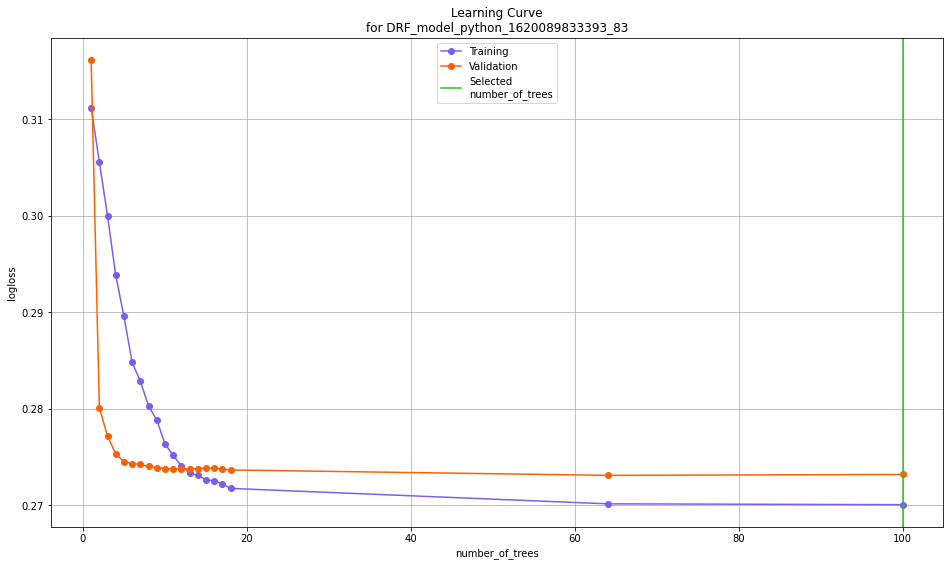

In [112]:
# if we don't save the output to the variable, the plot shows up twice
lc = drf.learning_curve_plot()

# Variable importances

In [114]:
drf.varimp()

[('AMT_GOODS_PRICE', 6925.46728515625, 1.0, 0.18551850098912043),
 ('AMT_CREDIT', 6674.6279296875, 0.9637801544443957, 0.17879904953558726),
 ('AMT_ANNUITY', 5771.5029296875, 0.8333737915501951, 0.1546062565720119),
 ('NAME_EDUCATION_TYPE',
  4849.44482421875,
  0.7002335906795549,
  0.12990628608510035),
 ('CODE_GENDER', 4237.8916015625, 0.6119286146432047, 0.11352407930095647),
 ('AMT_INCOME_TOTAL',
  2852.423583984375,
  0.411874530127106,
  0.07641034542477904),
 ('CNT_CHILDREN', 2193.483642578125, 0.31672716832834424, 0.05875874949080325),
 ('FLAG_OWN_CAR', 2031.998046875, 0.2934095221603743, 0.05443289472712675),
 ('NAME_CONTRACT_TYPE',
  1186.620849609375,
  0.17134162948870285,
  0.03178704225977742),
 ('FLAG_OWN_REALTY',
  606.87158203125,
  0.08762897246399425,
  0.016256795614737123)]

<Figure size 396x396 with 0 Axes>

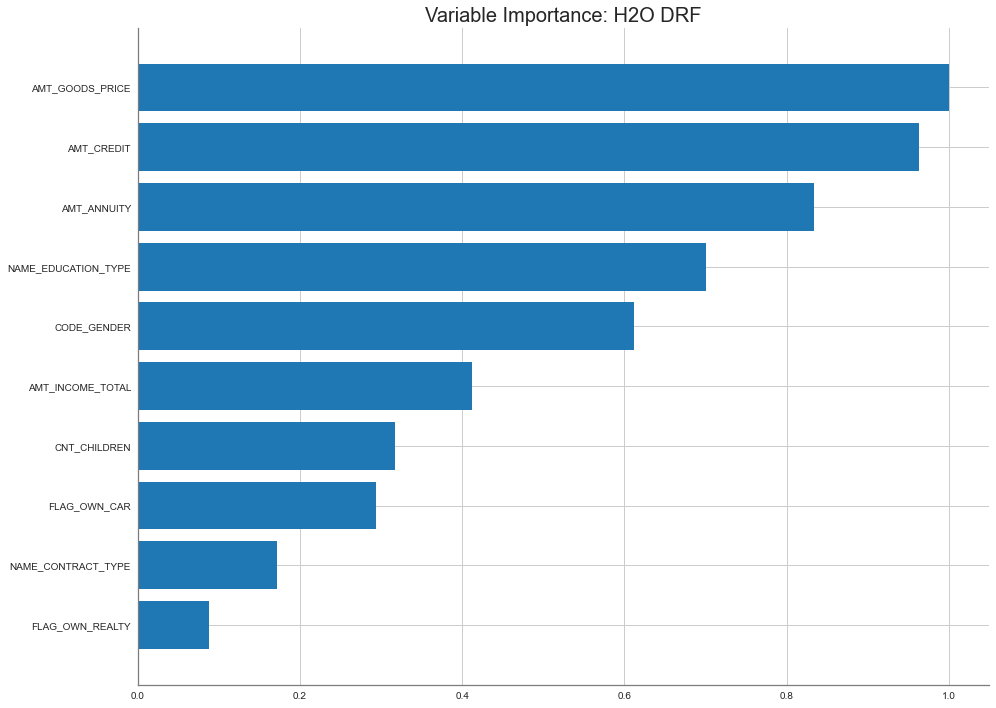

In [153]:
f = plt.figure(figsize=(5.5, 5.5))
drf.varimp_plot(server=True)
plt.tight_layout()
plt.savefig('B17030_15_03.png', dpi=300, facecolor='w')

## sklearn feature importances

C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\yellowbrick\base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


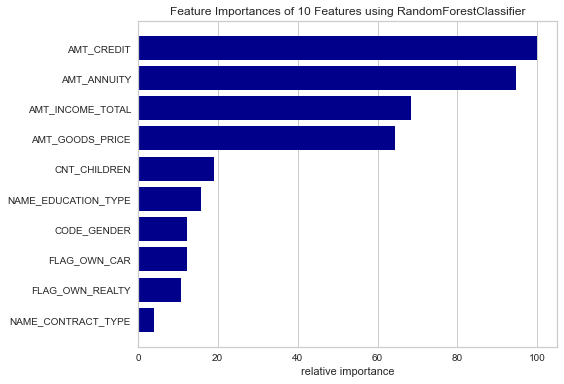

In [154]:
from yellowbrick.model_selection import feature_importances

_ = feature_importances(gs.best_estimator_, x_train, y_train, colors=['darkblue'] * features.shape[0])
plt.tight_layout()
plt.savefig('B17030_15_04.png', dpi=300)